# Description
This progam is used to process and analize the images recived from the phase3. </br>

After having selected the good imges, by analising them, it came out that the color mapped images based on the ndvi calculation had some errors. The ndvi image was infact cropped in a square that should have been centered but because its dimensions were calculated on the samples images and because propbably the positioning of the camera  in the ISS had been changed, the square that was produced by the programm during the flight is not centered and therefore neather the ndvi color mapped images are. This caused the image to have some black areas that altered the color mapping process because it altered the calculation of the contrast. Therefore using both python and other programs we performed some changes to every chosen image in order to make tham all the same and suitable for the next phases of the analisi. We also created copies of the chosen images cropped in the desired formact. </br></br>

The other main problem was that the color map chosen revealed not clear because although it makes very visible the different colors of the images it does not show clearly how the ndvi index value changes. Therefore we tried to resolve this problem by finding and using other color maps and after some testings we find one (from matplotlib color map reference) that was suitable for our needs. We wanted to reduce al much as possible the number of colors used in order to enhance even more the ndvi values. Whe also tried to avoid using color maps that could confuse. </br></br>

# NDVI calculation

In [9]:
#importing the needed libraries
from cProfile import label
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

We used parts of the phase 3 code in order to perform again the calculation of the ndvi values of every pixel of every image chosen. 

In [15]:
# function to increase the contrast
def contrast(img):
    in_min = np.percentile(img, 5)
    in_max = np.percentile(img, 95)

    out_min = 0.0
    out_max = 255.0

    out = img - in_min
    out *= ((out_min - out_max) / (in_min - in_max))
    out += in_min
    return out


# function to culculate the ndvi index
def calc_ndvi(img):
    # create the variabels for the 3 colors channels: red. green and blue
    b, g, r = cv2.split(img)

    # create bottom as the sum of the red and blue channel
    bottom = (r.astype(float) + b.astype(float))

    # initialize bottom
    # to avoid dividing by 0 wich won't give a risult
    bottom[bottom == 0] = 0.01

    # calculate the ndvi index
    ndvi = (b.astype(float) - r) / bottom
    return ndvi


# load the original IR img
#original = cv2.imread(f'img/chosen/131.png')
original = cv2.imread(f'/Users/tommasodognini/Documents/astroPi_F2D2/analisi_phase4/img_analisi_report/gargano.png')

# apply contrast to the original img
contrasted = contrast(original)

# calculate ndvi and apply contrast to the ndvi img to enhance the color mapping
ndvi = calc_ndvi(contrasted)
ndvi_contrasted = contrast(ndvi)

# Color mapping

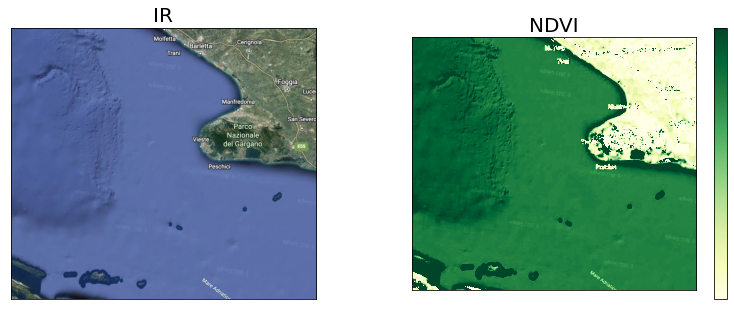

In [16]:
fig,(ax0, ax1)= plt.subplots(1,2, figsize=(14, 5))
# ax0
ax0.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title('IR',fontsize=20 )

#ax1
imgplot = plt.imshow(ndvi_contrasted)
imgplot.set_cmap('YlGn')
cbar = plt.colorbar(orientation="vertical", shrink=1, pad=0.05, aspect=20)
#cbar.set_label(label='NDVI')
cbar.set_ticks([])
plt.clim(0,255)
plt.yticks([])
plt.xticks([])
ax1.set_title('NDVI', fontsize=20)
plt.show()
